In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import os

# Define dataset paths
tender_dir = 'C:/Users/chand/OneDrive/Documents/GitHub/agritech/Custom Dataset/Tender'
mature_dir = 'C:/Users/chand/OneDrive/Documents/GitHub/agritech/Custom Dataset/Mature'

# Basic parameters
img_width, img_height = 150, 150  # Image dimensions for resizing
batch_size = 32

# Data Augmentation and Preprocessing
data_gen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values to [0, 1]
    validation_split=0.2,  # Use 20% of the data for validation
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = data_gen.flow_from_directory(
    directory=os.path.dirname(tender_dir),
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',  # Two categories: tender or mature
    subset='training'
)

validation_generator = data_gen.flow_from_directory(
    directory=os.path.dirname(tender_dir),
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

# Model Definition
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Binary classification loss
    metrics=['accuracy']
)

# Train the model
epochs = 15
model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

# Save the model
model.save('coconut_maturity_model.h5')

print("Model training complete and saved as 'coconut_maturity_model.h5'")


Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Epoch 1/15
50/50 [==============================] - 64s 1s/step - loss: 0.4111 - accuracy: 0.8138 - val_loss: 0.4614 - val_accuracy: 0.7050
Epoch 2/15
50/50 [==============================] - 66s 1s/step - loss: 0.0840 - accuracy: 0.9694 - val_loss: 0.4830 - val_accuracy: 0.8150
Epoch 3/15
50/50 [==============================] - 62s 1s/step - loss: 0.0176 - accuracy: 0.9950 - val_loss: 0.1953 - val_accuracy: 0.9025
Epoch 4/15
50/50 [==============================] - 65s 1s/step - loss: 0.0205 - accuracy: 0.9931 - val_loss: 1.1789 - val_accuracy: 0.7625
Epoch 5/15
50/50 [==============================] - 72s 1s/step - loss: 0.0399 - accuracy: 0.9894 - val_loss: 3.3462 - val_accuracy: 0.7500
Epoch 6/15
50/50 [==============================] - 81s 2s/step - loss: 0.0250 - accuracy: 0.9919 - val_loss: 1.1526 - val_accuracy: 0.7725
Epoch 7/15
50/50 [==============================] - 65s 1s/step - loss: 0.004

9406464/9406464 [==============================] - 1s 0us/step
Epoch 1/15
50/50 [==============================] - 50s 961ms/step - loss: 0.1821 - accuracy: 0.9162 - val_loss: 0.0478 - val_accuracy: 0.9825
Epoch 2/15
50/50 [==============================] - 46s 930ms/step - loss: 0.0503 - accuracy: 0.9831 - val_loss: 0.0524 - val_accuracy: 0.9800
Epoch 3/15
50/50 [==============================] - 46s 930ms/step - loss: 0.0321 - accuracy: 0.9881 - val_loss: 0.0285 - val_accuracy: 0.9925
Epoch 4/15
50/50 [==============================] - 48s 958ms/step - loss: 0.0178 - accuracy: 0.9919 - val_loss: 0.0262 - val_accuracy: 0.9875
Epoch 5/15
50/50 [==============================] - 50s 1s/step - loss: 0.0169 - accuracy: 0.9944 - val_loss: 0.0310 - val_accuracy: 0.9875
Epoch 6/15
50/50 [==============================] - 48s 958ms/step - loss: 0.0165 - accuracy: 0.9944 - val_loss: 0.0285 - val_accuracy: 0.9875
Epoch 7/15
50/50 [==============================] - 50s 1s/step - loss: 0.0105 - a

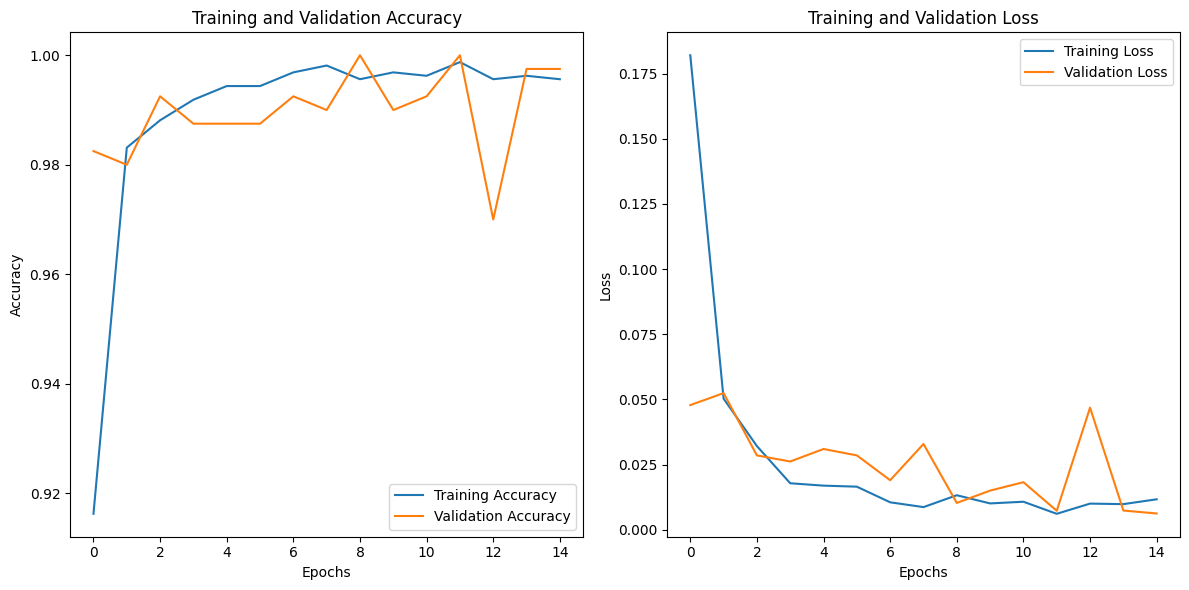

Model training complete and saved as 'coconut_maturity_model_mobilenet.h5'


In [7]:
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

# Load the MobileNetV2 base model pre-trained on ImageNet
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the base model layers
base_model.trainable = False

# Add custom layers on top of MobileNetV2
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

# Save the model
model.save('coconut_maturity_model_mobilenet.h5')

# Plot the training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

print("Model training complete and saved as 'coconut_maturity_model_mobilenet.h5'")


In [22]:
model.save('C:/Users/chand/OneDrive/Desktop/coconut_maturity_model_mobilenet.h5')


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x0000014C90ABD430>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x0000014C90ABD430>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Orig

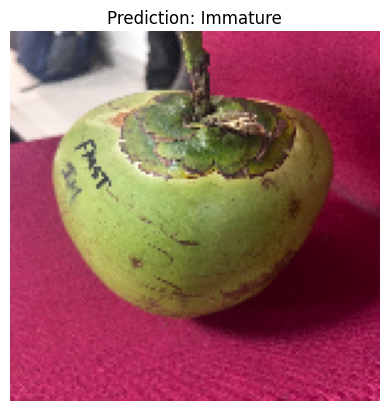

In [27]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the model
model = tf.keras.models.load_model('coconut_maturity_model_mobilenet.h5')

# Load and preprocess the image
img_path = r'C:\Users\chand\OneDrive\Desktop\test1.jpg'  # Use the correct path

# Load the image and resize it to 150x150 (the input size the model expects)
img = image.load_img(img_path, target_size=(150, 150))

# Convert image to numpy array and scale pixel values to [0, 1]
img_array = image.img_to_array(img) / 255.0

# Expand dimensions to match the batch size (1, 150, 150, 3)
img_array = np.expand_dims(img_array, axis=0)

# Predict the class
predictions = model.predict(img_array)

# Print the predictions
print("Predictions:", predictions)

# If you have a class label list (for example, 'coconut_mature', 'coconut_immature', etc.)
# Replace with your actual class labels
class_labels = ['Immature', 'Mature']  # Example class labels, change as needed

# Get the predicted class index
predicted_class_index = np.argmax(predictions)

# Print the predicted class
print(f"Predicted Class: {class_labels[predicted_class_index]}")

# Optionally, show the image
plt.imshow(img)
plt.title(f"Prediction: {class_labels[predicted_class_index]}")
plt.axis('off')
plt.show()


In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models

def SqueezeNet(input_shape=(150, 150, 3), num_classes=1):
    input = layers.Input(shape=input_shape)

    # Initial Convolution Layer
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)

    # Fire Module 1
    x = layers.Conv2D(16, (1, 1), activation='relu', padding='same')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)

    # Fire Module 2
    x = layers.Conv2D(16, (1, 1), activation='relu', padding='same')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)

    # Fire Module 3
    x = layers.Conv2D(32, (1, 1), activation='relu', padding='same')(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)

    # Global Average Pooling
    x = layers.GlobalAveragePooling2D()(x)

    # Fully Connected Layer
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)

    # Output Layer
    output = layers.Dense(num_classes, activation='sigmoid')(x)

    model = models.Model(inputs=input, outputs=output)

    return model

# Instantiate the model
model = SqueezeNet(input_shape=(150, 150, 3), num_classes=1)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 150, 150, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 16)        1040      
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 64)        9280      
                                                                 
 conv2d_6 (Conv2D)           (None, 75, 75, 16)        1040      
                                                             